In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Bar Chart

In [2]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head()

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


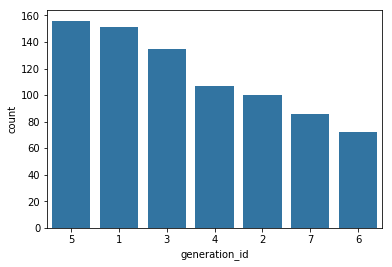

In [4]:
base_color = sb.color_palette()[0]
gen_order = pokemon['generation_id'].value_counts().index
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, 
             order = gen_order);

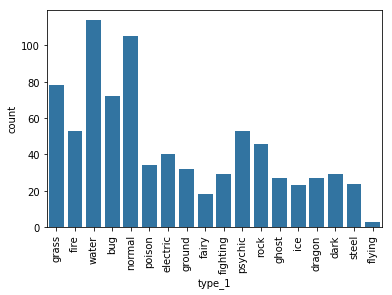

In [5]:
sb.countplot(data = pokemon, x = 'type_1', color = base_color);
plt.xticks(rotation = 90);

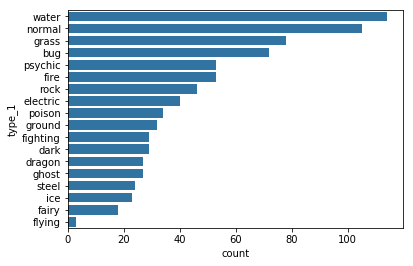

In [10]:
type_counts = pokemon['type_1'].value_counts()
type_order = type_counts.index
sb.countplot(data = pokemon, y = 'type_1', color = base_color, 
             order = type_order);

In [11]:
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.1412639405204461

In [12]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14']

In [13]:
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14])

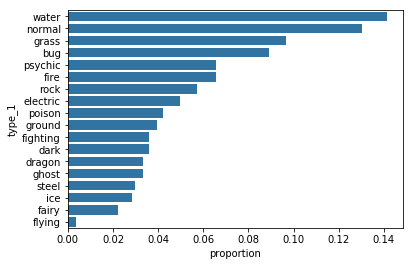

In [14]:
sb.countplot(data = pokemon, y = 'type_1', color = base_color, 
             order = type_order);
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion');

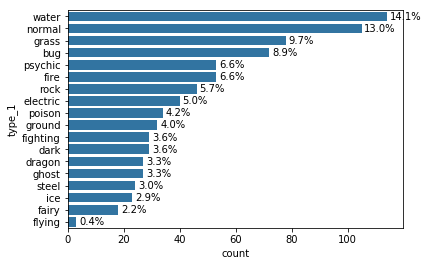

In [15]:
sb.countplot(data = pokemon, y = 'type_1', color = base_color, 
             order = type_order);
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va = 'center')

## Pie Chart

In [16]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [17]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

(-1.1010649271147273, 1.1037338461314978, -1.101693669869755, 1.10310510337647)

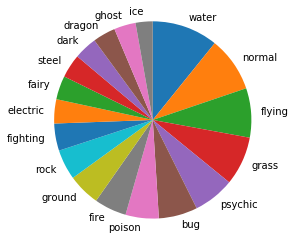

In [19]:
plt.pie(type_counts, labels = type_counts.index, startangle = 90,
       counterclock = False)
plt.axis('square')

(-1.1010649271147273, 1.1037338461314978, -1.101693669869755, 1.10310510337647)

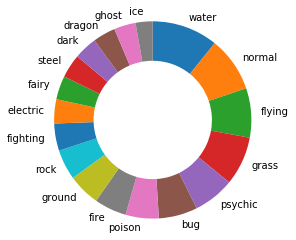

In [20]:
plt.pie(type_counts, labels = type_counts.index, startangle = 90,
       counterclock = False, wedgeprops = {'width': 0.4})
plt.axis('square')

## Histogram

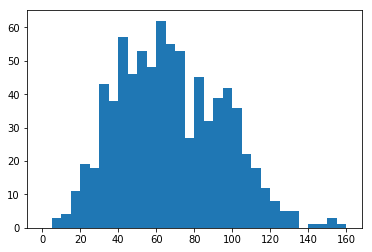

In [24]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

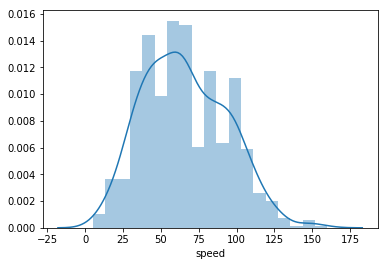

In [27]:
sb.distplot(pokemon['speed']);

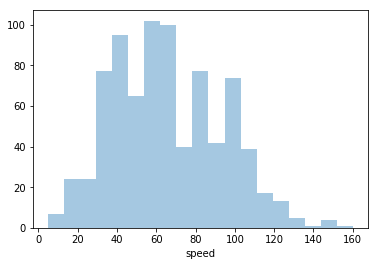

In [29]:
sb.distplot(pokemon['speed'], kde = False);

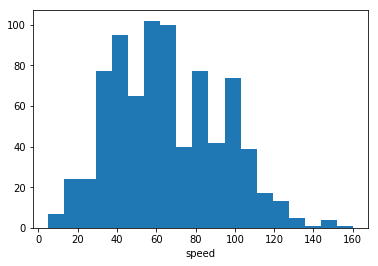

In [30]:
sb.distplot(pokemon['speed'], kde = False, hist_kws = {'alpha':1});

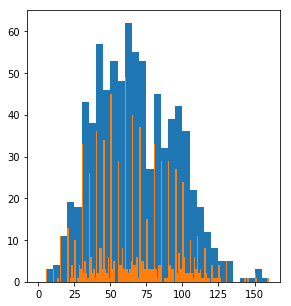

In [36]:
plt.figure(figsize = [10, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

bins = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bins);

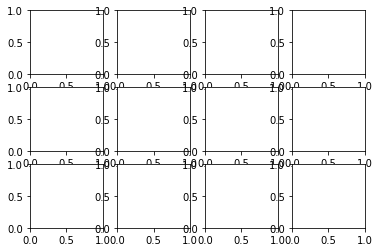

In [41]:
plt.subplots(3, 4);

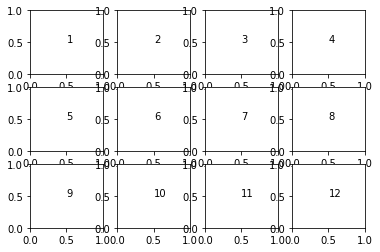

In [42]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of

(0, 6)

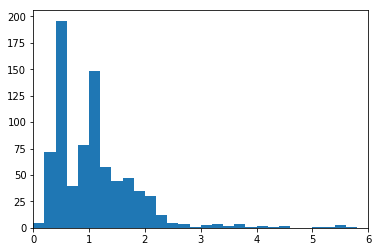

In [44]:
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins);
plt.xlim((0, 6))

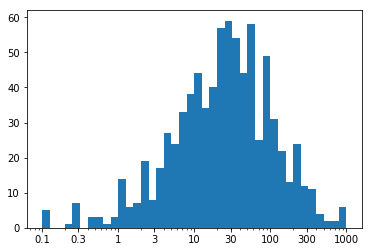

In [55]:
bins = 10**np.arange(-1, 3+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels =['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);

In [50]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

## Scatterplot

In [106]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


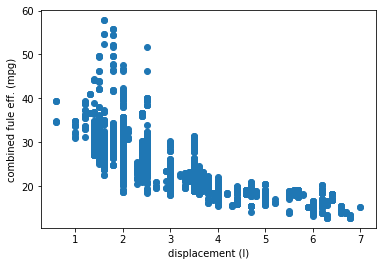

In [63]:
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('displacement (l)')
plt.ylabel('combined fule eff. (mpg)');

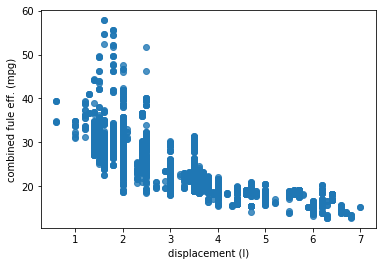

In [66]:
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False);
plt.xlabel('displacement (l)')
plt.ylabel('combined fule eff. (mpg)');

Text(0,0.5,'combined fule eff. (mpg)')

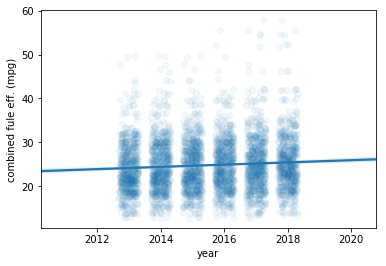

In [72]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
          scatter_kws = {'alpha': 1/20});
plt.xlabel('year')
plt.ylabel('combined fule eff. (mpg)')

## Heatmap

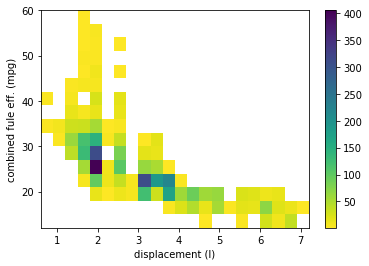

In [79]:
bins_x = np.arange(0.6, 7 + 0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('displacement (l)')
plt.ylabel('combined fule eff. (mpg)');

In [78]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


## Violin plot

In [107]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
veclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(veclasses)

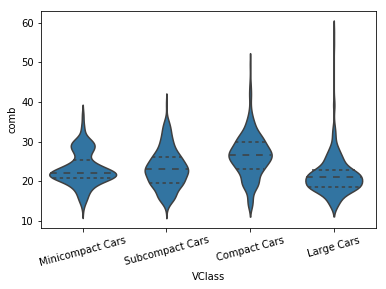

In [92]:
base_colar = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb', 
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

## Box plot

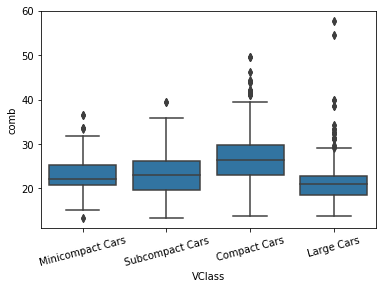

In [91]:
base_colar = sb.color_palette()[0]
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb', color = base_color);
plt.xticks(rotation = 15);

## Clustered bar chart

In [93]:
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,NaN,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [94]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

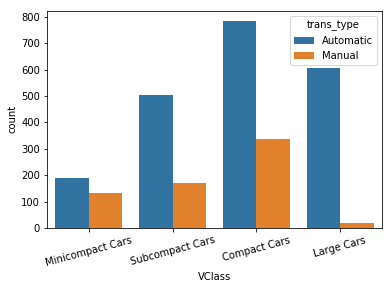

In [95]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation = 15);

## Faceting

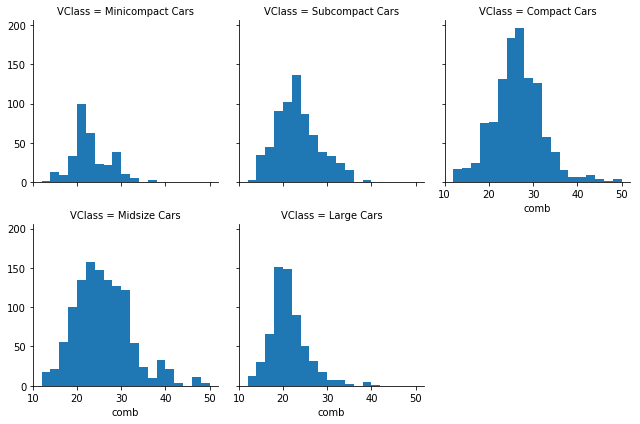

In [108]:
bins = np.arange(12, 50+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3)
g.map(plt.hist, 'comb', bins = bins);

## Adaption of univariate plots

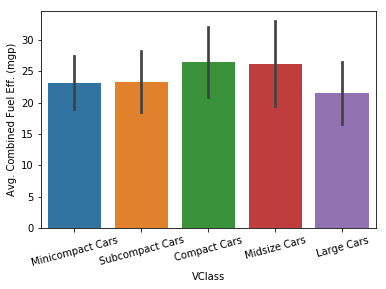

In [111]:
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd')
plt.xticks(rotation = 15);
plt.ylabel('Avg. Combined Fuel Eff. (mgp)');

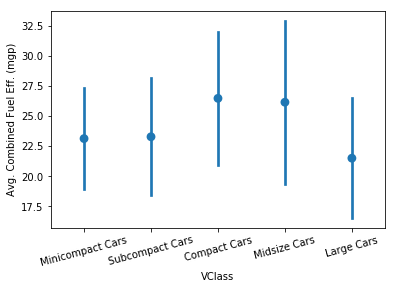

In [113]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb', ci = 'sd', linestyles = '')
plt.xticks(rotation = 15);
plt.ylabel('Avg. Combined Fuel Eff. (mgp)');

In [114]:
THRESHOLD = 80
make_frequency = fuel_econ['make'].value_counts()
idx = np.sum(make_frequency > THRESHOLD)
most_makes = make_frequency.index[:idx]
fuel_econ_sub = fuel_econ.loc[fuel_econ['make'].isin(most_makes)]

In [115]:
make_means = fuel_econ_sub.groupby('make').mean()
comb_order = make_means.sort_values('comb', ascending = False).index

Text(0.5,0,'Average Combined Fuel Eff. (mpg)')

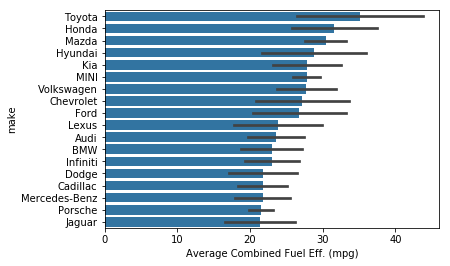

In [116]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ_sub, x = 'comb', y = 'make',
               color = base_color, order = comb_order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)')

/Users/gongmengyan/anaconda3/envs/sci/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


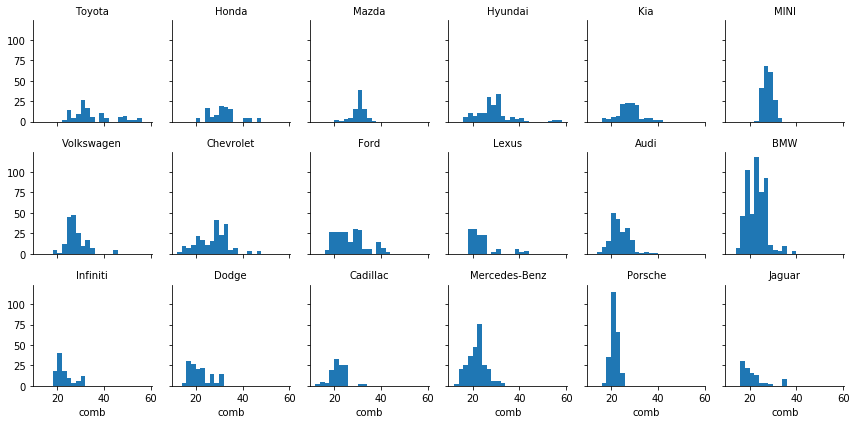

In [118]:
g = sb.FacetGrid(data = fuel_econ_sub, col = 'make', col_wrap = 6, size = 2,
                     col_order = comb_order)
g.map(plt.hist, 'comb', bins = np.arange(12, fuel_econ_sub['comb'].max()+2, 2))
g.set_titles('{col_name}')